## Filmleri ozelliklerine gore benzerliklerine bakacagiz

In [17]:
# Import 
import numpy as np
import pandas as pd

#  IMDb ve Wiki verilerinin birlesmis hali
movies_df = pd.read_csv("/content/movies.csv")

print("Yuklenen dosya sayisi %s " % (len(movies_df)))

movies_df.head()

Yuklenen dosya sayisi 100 


,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [18]:
movies_df['wiki_plot'][0]

'On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson   Johnny Fontane  Johnny Fontane  , a popul

## wiki_plot ve imdb_plot sutunlarini tek sutun haline getirelim

In [19]:
movies_df["plot"] = movies_df["wiki_plot"].astype(str) + "\n" + \
                    movies_df["imdb_plot"].astype(str)
movies_df.head()

,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


Ihtiyac duyacagimiz nltk kutuphanesini indirelim

In [5]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Tokenization

In [20]:
import nltk
nltk.download('punkt')

# ornek bir tokenization yapalim
sent_tokenized = [sent for sent in nltk.sent_tokenize("""
                        Today (May 19, 2016) is his only daughter's wedding. 
                        Vito Corleone is the Godfather.
                        """)]

words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]
import re
filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]
filtered

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']

## Stemming

In [21]:
# Import SnowballStemmer
from nltk.stem.snowball import SnowballStemmer

# ingilizce dili icin stemmer objesini olsuturalim
stemmer = SnowballStemmer("english")

print("stemming olmadan : ", filtered)

# stemming islemini uygulayalim
stemmed_words = [stemmer.stem(t) for t in filtered]

print("stemming den sonra:   ", stemmed_words)

stemming olmadan :  ['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']
stemming den sonra:    ['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


## Tokenize & Stem

hem tokenization hem de steming yapacak fonksiyonu tanimlayalim

In [22]:
def tokenize_and_stem(text):
    
    # once cumle cumle sonra kelime kelime Tokenize 
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    # raw tokens leri kaldiralim (islenmemeis tokenleri)
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    
    return stems

words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's wedding.")
print(words_stemmed)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


## TfidfVectorizer

In [23]:
# Import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

# ITfidfVectorizer ile stop_word leri, tokenization ve stemming islemi 
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [24]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in movies_df["plot"]])

print(tfidf_matrix.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


(100, 564)


# KMeans ile kumeleme

In [25]:
# Import k-means 
from sklearn.cluster import KMeans

# KMeans nesnesini olusturup n_cluster i 5 verelim
km = KMeans(n_clusters=5)

# k-means i tfidf_matrix ile fit edelim
km.fit(tfidf_matrix)

#labellarini  clusters a liste olarak tanimlayalim
clusters = km.labels_.tolist()

# cluster adinda sutun olusturalim ve her film icin kumeleme olusturalim
movies_df["cluster"] = clusters

# her kumede ne kadar film var bakalim
movies_df['cluster'].value_counts() 

2    61
0    21
1    10
3     5
4     3
Name: cluster, dtype: int64

## cosine_similarity ile benzerliklerini hesaplayalim

In [26]:
# Import cosine_similarity 
from sklearn.metrics.pairwise import cosine_similarity

# benzerlikelerini hesaplayalim
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

## Dendrograms

Dendrogram ile dallara ayirarak benzerliklerini gorelim.

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram

 Benzerlik mesafesi (similarity distance ) ne kadar dusukse grafik uzerinde y-ekseninde o kadar yakin olacak. Bunun icin linkage ile nesne olusturacagiz. Ornegin Wonderful Life ve A Place in the Sun oldukca benzerler.



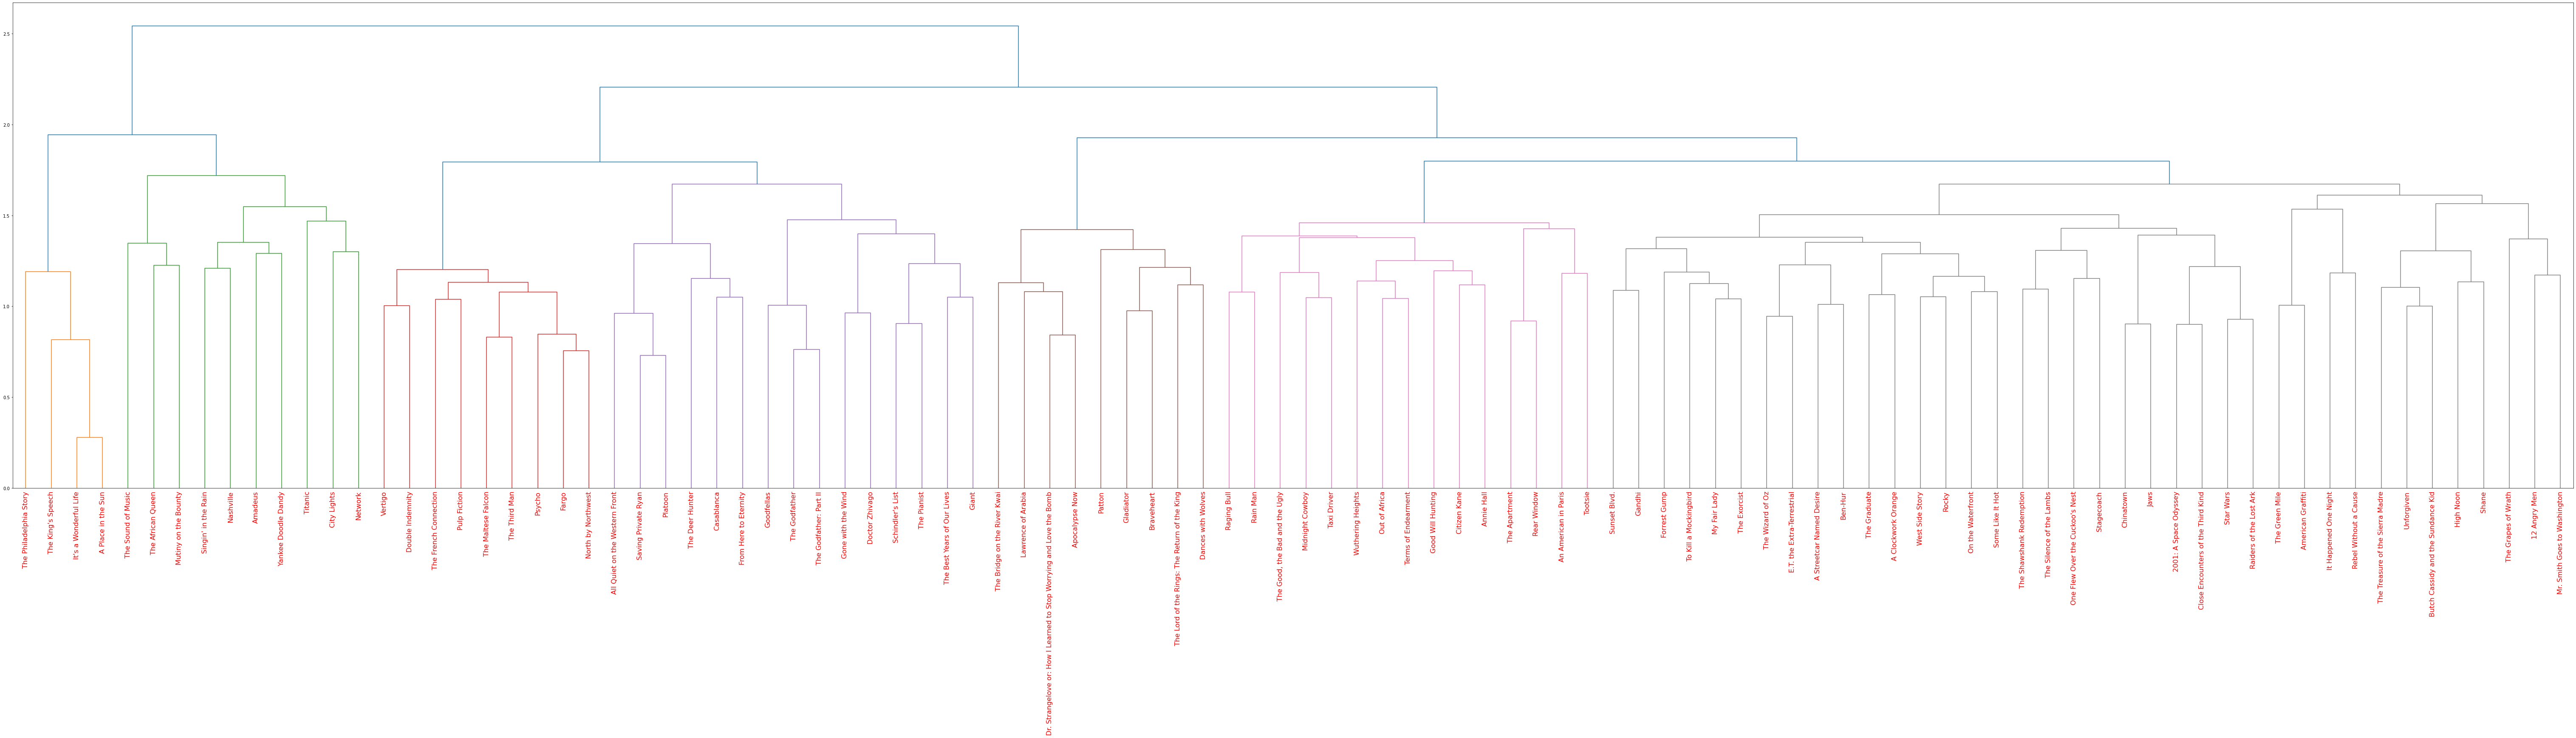

In [28]:
mergings = linkage(similarity_distance, method='complete')

#dendrogram oluturalim ve title olarak  sutunlarin adlarini verelim
dendrogram_ = dendrogram(mergings,
               labels=[x for x in movies_df["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

plt.show()

Grafikte dallandirma ile film benzerliklerini kiyaslamis olduk.